In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sys

# 경고창이 뜨지 않도록 해주는 코드
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

In [2]:
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False
    
if platform.system() == 'Windows': # 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

In [345]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,country,description,designation,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,points
0,Australia,"Possibly a little sweet, this is a soft, easyg...",NaN,5.0,Australia Other,South Eastern Australia,NaN,Joe Czerwinski,@JoeCz,Banrock Station 2006 Chardonnay (South Eastern...,Chardonnay,Banrock Station,83
1,France,"A soft, almost off dry wine that is full in th...",Réserve,12.0,Rhône Valley,Côtes du Rhône,NaN,Roger Voss,@vossroger,Cellier des Dauphins 2015 Réserve Rosé (Côtes ...,Rosé,Cellier des Dauphins,85
2,Spain,Generic white-fruit aromas of peach and apple ...,Estate Grown & Bottled,9.0,Northern Spain,Rueda,NaN,Michael Schachner,@wineschach,Esperanza 2013 Estate Grown & Bottled Verdejo-...,Verdejo-Viura,Esperanza,86
3,US,This is the winery's best Nebula in years. Whi...,Nebula,29.0,California,Paso Robles,Central Coast,NaN,NaN,Midnight 2010 Nebula Cabernet Sauvignon (Paso ...,Cabernet Sauvignon,Midnight,87
4,US,This is a very rich Pinot whose primary virtue...,Wiley Vineyard,40.0,California,Anderson Valley,NaN,NaN,NaN,Harrington 2006 Wiley Vineyard Pinot Noir (And...,Pinot Noir,Harrington,88


In [6]:
train.shape

(103976, 13)

In [7]:
train.isnull().sum()

country                     51
description                  0
designation              30009
price                     7195
province                    51
region_1                 17022
region_2                 63568
taster_name              20971
taster_twitter_handle    24982
title                        0
variety                      1
winery                       0
points                       0
dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103976 entries, 0 to 103975
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                103925 non-null  object 
 1   description            103976 non-null  object 
 2   designation            73967 non-null   object 
 3   price                  96781 non-null   float64
 4   province               103925 non-null  object 
 5   region_1               86954 non-null   object 
 6   region_2               40408 non-null   object 
 7   taster_name            83005 non-null   object 
 8   taster_twitter_handle  78994 non-null   object 
 9   title                  103976 non-null  object 
 10  variety                103975 non-null  object 
 11  winery                 103976 non-null  object 
 12  points                 103976 non-null  int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 10.3+ MB


+ designation: 포도밭 정보, 없다는 것 자체가 정보일 수 있음 -> Unknown으로
+ price -> 뭔가로 채우긴 해야할 듯
+ country 없는건 그냥 제거
+ region, taster는 잘 모르겠다.. 아주 중요할 것 같긴 한데

+ title에서는 빈티지를 뽑을 수 있다 (년도)
+ variety 하나는 버리자

In [22]:
train['designation'] = train['designation'].fillna('unknown') 

In [26]:
df = train.dropna(subset='country')

In [27]:
df = df.dropna(subset='variety')

In [29]:
del df['region_2']

# 1. EDA

1. 지역(country -> province, region   //  designation) : 범주형, 지도
2. 설명(description) : str, 특정 단어 포함 여부 등으로 활용
3. 평가자(taster_name, taster_twitter_handle) : 범주형
4. 이름 (title): 범주형  ->  생산년도: 연속형
5. 품종, 와이너리 (variety, winery) : 범주형



6. 가격 (price) : 연속형


### a. 지역

In [188]:
province_count = train['province'].value_counts() > 10

In [201]:
morethan10 = province_count.index
df_10 = train[train['province'].isin(morethan10)]
df_10['price'].groupby(df_10['province']).mean().sort_values(ascending=False)


province
Colares              262.500000
Vânju Mare           166.000000
Switzerland          160.000000
Madeira               97.125000
Moscatel do Douro     94.750000
                        ...    
Viile Timis            8.000000
Table wine             8.000000
Tarnave                8.000000
Viile Timisului        7.611111
Egypt                       NaN
Name: price, Length: 407, dtype: float64

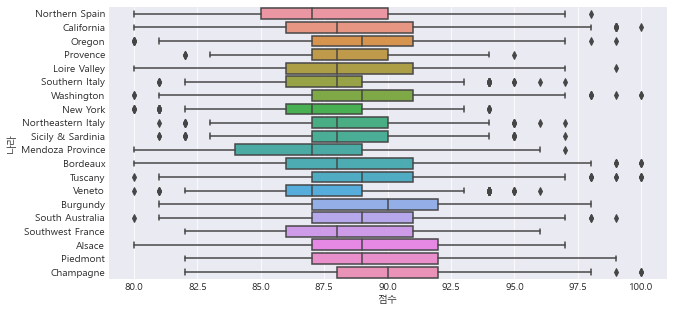

In [177]:
top_list = train['province'].value_counts().nlargest(20).index
df_top = train[train['province'].isin(top_list)]

plt.figure(figsize=(10,5))
box = sns.boxplot(y='province', x='points', data=df_top)
box.set_xlabel("점수")
box.set_ylabel("나라")
plt.show()

### b. 설명 (키워드 중심. 길이 중심. 감성분석 시간 나면 해보기)

### c. 평가자  (전처리 더 필요)

### d. 이름 (생산년도)

In [349]:
df

,country,description,designation,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,points,year
0,Australia,"Possibly a little sweet, this is a soft, easyg...",unknown,5.0,Australia Other,South Eastern Australia,Joe Czerwinski,@JoeCz,Banrock Station 2006 Chardonnay (South Eastern...,Chardonnay,Banrock Station,83,2006
1,France,"A soft, almost off dry wine that is full in th...",Réserve,12.0,Rhône Valley,Côtes du Rhône,Roger Voss,@vossroger,Cellier des Dauphins 2015 Réserve Rosé (Côtes ...,Rosé,Cellier des Dauphins,85,2015
2,Spain,Generic white-fruit aromas of peach and apple ...,Estate Grown & Bottled,9.0,Northern Spain,Rueda,Michael Schachner,@wineschach,Esperanza 2013 Estate Grown & Bottled Verdejo-...,Verdejo-Viura,Esperanza,86,2013
3,US,This is the winery's best Nebula in years. Whi...,Nebula,29.0,California,Paso Robles,NaN,NaN,Midnight 2010 Nebula Cabernet Sauvignon (Paso ...,Cabernet Sauvignon,Midnight,87,2010
4,US,This is a very rich Pinot whose primary virtue...,Wiley Vineyard,40.0,California,Anderson Valley,NaN,NaN,Harrington 2006 Wiley Vineyard Pinot Noir (And...,Pinot Noir,Harrington,88,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103971,New Zealand,"This is a fresh, fruit-driven rendering of Pin...",Fox By John Belsham,24.0,Marlborough,NaN,Joe Czerwinski,@JoeCz,Foxes Island 2014 Fox By John Belsham Pinot No...,Pinot Noir,Foxes Island,88,2014
103972,US,"A touch of oak adds a sweet, smoky creaminess ...",Charlotte's Home Estate,17.0,California,Northern Sonoma,NaN,NaN,Rodney Strong 2012 Charlotte's Home Estate Sau...,Sauvignon Blanc,Rodney Strong,87,2012
103973,US,"This is Bacchus vineyard fruit, as per normal ...",unknown,11.0,Washington,Columbia Valley (WA),Paul Gregutt,@paulgwine,Arbor Crest 2006 Sauvignon Blanc (Columbia Val...,Sauvignon Blanc,Arbor Crest,88,2006
103974,Italy,"This blend of Merlot, Cabernet Sauvignon and P...",Bulizio,36.0,Tuscany,Toscana,Kerin O’Keefe,@kerinokeefe,Le Palaie 2009 Bulizio Red (Toscana),Red Blend,Le Palaie,85,2009


In [361]:
import re #숫자만 추출

def year(row):
    numbers = re.findall("\d+", row['title'])
    a = '0'
    
    if len(numbers) >= 1:
        switch = 1
        for num in numbers:
            if (len(num) == 4) and (num not in row['designation']) and (num not in row['winery']):
                a = int(num)
                switch = 0
                
    elif len(numbers) == 0:
        a = '0'
    else:
        a = 'error'
    return a

In [362]:
train['designation'] = train['designation'].fillna('unknown') 

In [363]:
train['year'] = train.apply(year, axis=1)

In [352]:
train[train['year']=='none'].shape

(3701, 14)

In [364]:
df_elim = df[df['year']!='none']

103000 개 중 3000개 빼고 생산년도가 할당됨

In [338]:
df_elim = df_elim[(df_elim['year'] > 1997) & (df_elim['year'] < 2016)]

In [306]:
len(df_elim[(df_elim['year'] == 1997)])

253

In [339]:
df_elim = df_elim.astype({'year': 'int'})

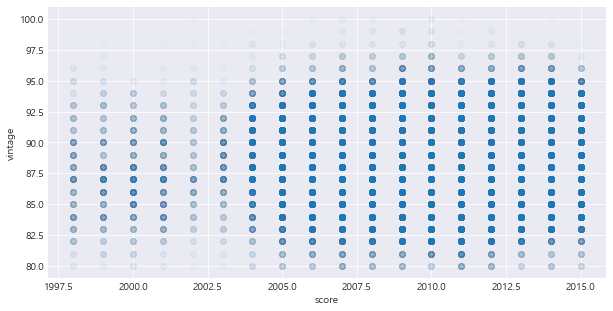

In [340]:
plt.figure(figsize=(10,5)) # 그래프가 나타날 창 크기 설정 (가로, 세로)
plt.scatter(data=df_elim, x='year', y='points', alpha=0.01) # 산점도
plt.xlabel('score') # x축 제목
plt.ylabel('vintage') # y축 제목
plt.show()

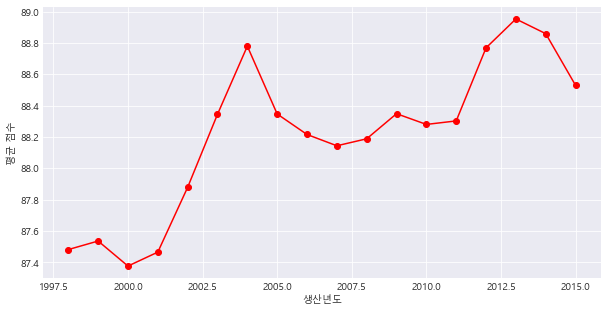

In [341]:
plt.figure(figsize=(10,5))
plt.plot(df_elim.groupby(['year']).points.mean(), marker='o', c='r') # marker: 마커의 모양, c = 라인 색상
plt.xlabel('생산년도')
plt.ylabel('평균 점수')
plt.show()

떨어지는 느낌이긴 한데.. 

In [342]:
pearson_corr = df_elim[['year','points','price']].corr(method='pearson')
pearson_corr

,year,points,price
year,1.000000,0.081832,-0.052452
points,0.081832,1.000000,0.406127
price,-0.052452,0.406127,1.000000


In [313]:
df_elim[(df_elim['year'] < 1990)]

,country,description,designation,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,points,year


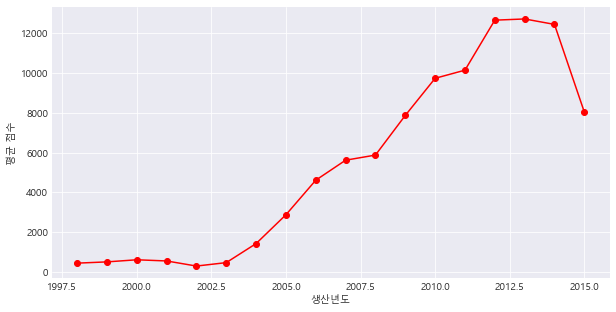

In [343]:
plt.figure(figsize=(10,5))
plt.plot(df_elim.groupby(['year']).points.count(), marker='o', c='r') # marker: 마커의 모양, c = 라인 색상
plt.xlabel('생산년도')
plt.ylabel('평균 점수')
plt.show()

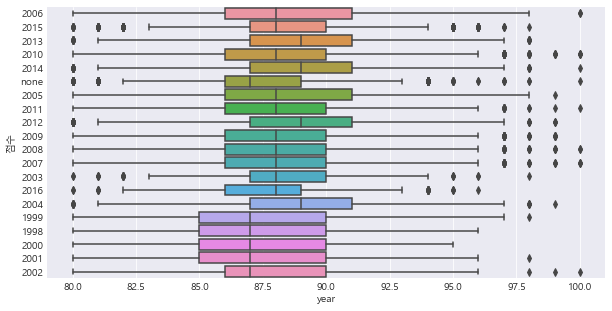

In [334]:
top_year = df['year'].value_counts().nlargest(20).index
df_top_year = df[df['year'].isin(top_year)]

plt.figure(figsize=(10,5))
box = sns.boxplot(y='year', x='points', data=df_top_year)
box.set_xlabel("year")
box.set_ylabel("점수")
plt.show()

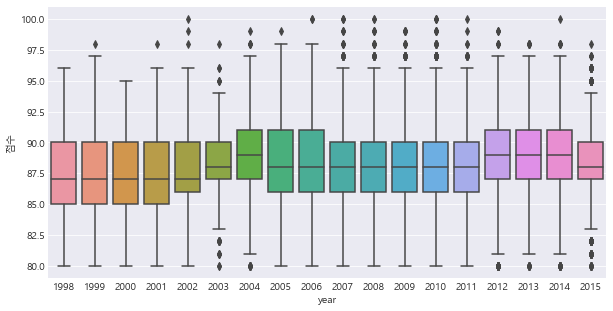

In [344]:
plt.figure(figsize=(10,5))
box = sns.boxplot(y='points', x='year', data=df_elim)
box.set_xlabel("year")
box.set_ylabel("점수")
plt.show()

In [332]:
df_elim.head()

,country,description,designation,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,points,year
0,Australia,"Possibly a little sweet, this is a soft, easyg...",unknown,5.0,Australia Other,South Eastern Australia,Joe Czerwinski,@JoeCz,Banrock Station 2006 Chardonnay (South Eastern...,Chardonnay,Banrock Station,83,2006
1,France,"A soft, almost off dry wine that is full in th...",Réserve,12.0,Rhône Valley,Côtes du Rhône,Roger Voss,@vossroger,Cellier des Dauphins 2015 Réserve Rosé (Côtes ...,Rosé,Cellier des Dauphins,85,2015
2,Spain,Generic white-fruit aromas of peach and apple ...,Estate Grown & Bottled,9.0,Northern Spain,Rueda,Michael Schachner,@wineschach,Esperanza 2013 Estate Grown & Bottled Verdejo-...,Verdejo-Viura,Esperanza,86,2013
3,US,This is the winery's best Nebula in years. Whi...,Nebula,29.0,California,Paso Robles,NaN,NaN,Midnight 2010 Nebula Cabernet Sauvignon (Paso ...,Cabernet Sauvignon,Midnight,87,2010
4,US,This is a very rich Pinot whose primary virtue...,Wiley Vineyard,40.0,California,Anderson Valley,NaN,NaN,Harrington 2006 Wiley Vineyard Pinot Noir (And...,Pinot Noir,Harrington,88,2006


In [325]:
top_year.sort_values()

TypeError: '<' not supported between instances of 'int' and 'str'

#### 포트와인 / none

In [368]:
port = df_elim[df_elim['variety']=='Port']

In [369]:
port.groupby(['year']).points.mean()

year
1935    94.000000
1941    93.000000
1952    95.500000
1957    95.000000
1961    95.000000
1963    92.666667
1964    93.000000
1965    94.000000
1966    95.000000
1967    94.000000
1968    95.000000
1974    93.000000
1978    94.000000
1983    92.000000
1984    94.000000
1986    94.000000
1992    92.000000
1994    90.000000
1996    91.000000
1997    89.600000
1998    90.000000
1999    91.000000
2000    90.333333
2001    91.666667
2002    85.000000
2003    89.785714
2004    88.909091
2005    89.473684
2006    87.800000
2007    90.666667
2008    88.826087
2009    90.630435
2010    89.321429
2011    92.323077
2012    90.882353
2013    90.900000
2014    90.714286
2015    91.347826
Name: points, dtype: float64

### e. 가격 (price)

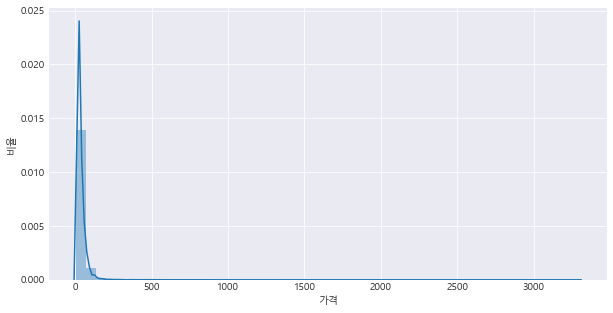

In [129]:
plt.figure(figsize=(10,5))

dist = sns.distplot(df['price']) 
dist.set_xlabel("가격")
dist.set_ylabel("비율")
plt.show()

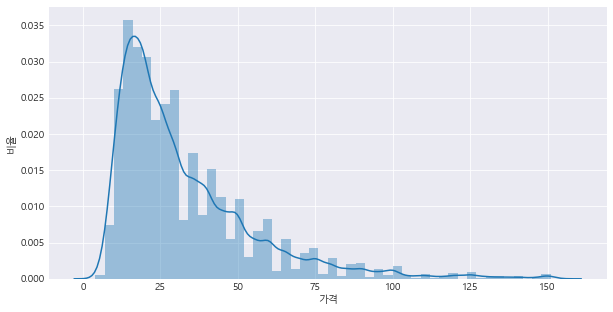

In [132]:
cut_point = df["price"].quantile(0.99)  # 상위 99% 값을 cut_point로 지정 
df_cut = df[df['price'] < cut_point]

plt.figure(figsize=(10,5))

dist = sns.distplot(df_cut['price']) 
dist.set_xlabel("가격")
dist.set_ylabel("비율")
plt.show()

상위 99% 값으로 해도 충분할 것 같다.

In [133]:
pearson_corr = df_cut[['points','price']].corr(method='pearson')
pearson_corr

,points,price
points,1.000000,0.544657
price,0.544657,1.000000


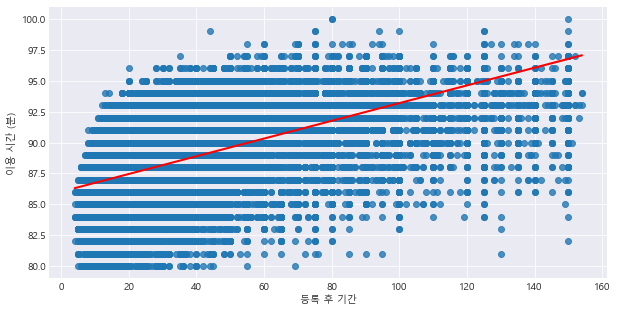

In [137]:


plt.figure(figsize=(10,5))
sns.regplot(data=df_cut, x='price', y='points', 
            line_kws={"color":"red", "lw":2}) # line 색깔, 두께 지정
plt.xlabel('등록 후 기간') 
plt.ylabel('이용 시간 (분)') 
plt.show()

In [ ]:
train['train']

### 품종 (variety)

In [124]:
df['variety'].nunique()

670

### designation

In [141]:
df['designation'].nunique()

32941

In [151]:
top_list = df['designation'].value_counts().nlargest(30).index

In [158]:
df['designation'].value_counts().nlargest(50)

unknown                      30001
Reserve                       1631
Estate                        1040
Reserva                        988
Riserva                        523
Estate Grown                   489
Brut                           417
Dry                            328
Barrel sample                  298
Crianza                        273
Estate Bottled                 273
Vieilles Vignes                232
Brut Rosé                      229
Gran Reserva                   205
Barrel Sample                  199
Tradition                      195
Old Vine                       177
Extra Dry                      156
Rosé of                        145
Rosé                           127
Réserve                        122
Single Vineyard                108
Estate Reserve                 102
Vintage                         96
Unoaked                         93
Classic                         88
Bien Nacido Vineyard            87
Late Harvest                    84
Barrel Select       

In [152]:
df_top = df[df['designation'].isin(top_list)]

In [153]:
df_top.head()

,country,description,designation,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,points,year
0,Australia,"Possibly a little sweet, this is a soft, easyg...",unknown,5.0,Australia Other,South Eastern Australia,Joe Czerwinski,@JoeCz,Banrock Station 2006 Chardonnay (South Eastern...,Chardonnay,Banrock Station,83,2006
1,France,"A soft, almost off dry wine that is full in th...",Réserve,12.0,Rhône Valley,Côtes du Rhône,Roger Voss,@vossroger,Cellier des Dauphins 2015 Réserve Rosé (Côtes ...,Rosé,Cellier des Dauphins,85,2015
5,US,"An unabashedly rich and luscious wine, this co...",unknown,22.0,California,Sonoma County-Monterey County-Santa Barbara Co...,Jim Gordon,@gordone_cellars,Meiomi 2013 Chardonnay (Sonoma County-Monterey...,Chardonnay,Meiomi,90,2013
8,US,"Here's a good, everyday Cab if you're looking ...",unknown,10.0,California,Central Coast,NaN,NaN,Cupcake 2005 Cabernet Sauvignon (Central Coast),Cabernet Sauvignon,Cupcake,84,2005
13,US,It shows ultrarich tannins and a flavor comple...,unknown,20.0,California,Russian River Valley,NaN,NaN,Novy 2012 Zinfandel (Russian River Valley),Zinfandel,Novy,87,2012


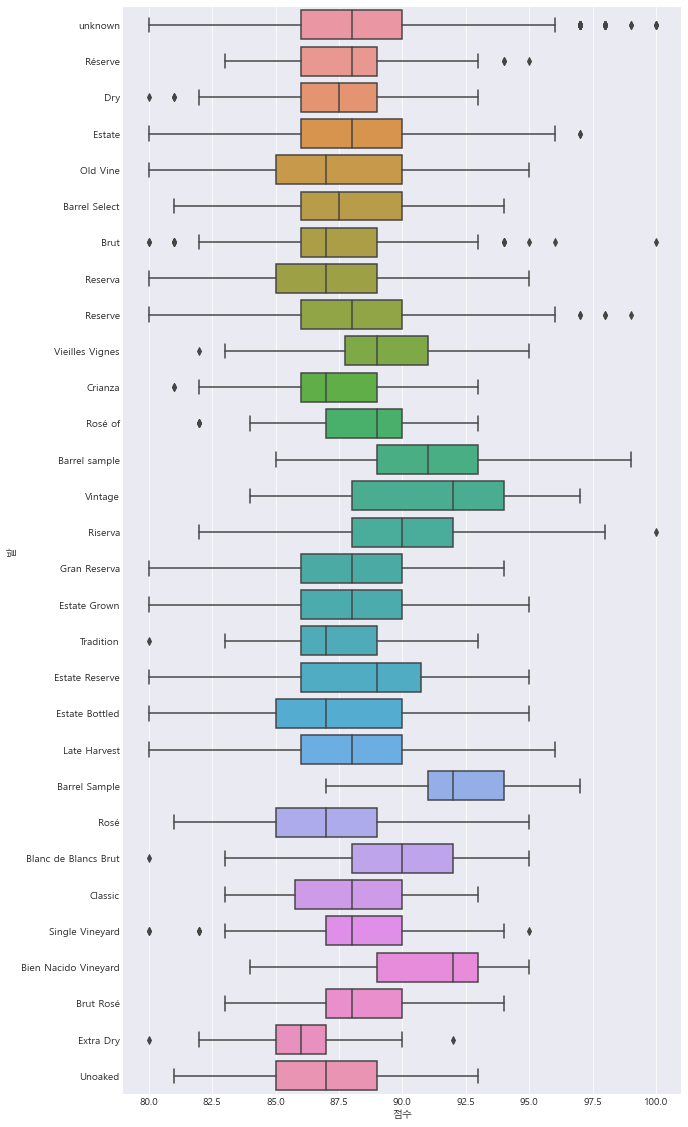

In [156]:
plt.figure(figsize=(10,20))
box = sns.boxplot(y='designation', x='points', data=df_top)
box.set_xlabel("점수")
box.set_ylabel("밭")
plt.show()

### 와이너리

In [ ]:
train['winery'] 